### Data Exploration

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data = pd.read_csv("/content/airline-price-prediction.csv", engine='python', on_bad_lines='skip')

In [ ]:
#Exploring Data
Data.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,price
0,5/3/2022,Vistara,UK,812,9:45,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...","56,588"
1,18-03-2022,Vistara,UK,975,5:45,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}","59,649"
2,9/3/2022,GO FIRST,G8,7537,14:30,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}","3,916"
3,15-03-2022,GO FIRST,G8,287,10:40,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}","6,031"
4,22-03-2022,Vistara,UK,826,12:30,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}","7,081"


In [ ]:
#Checking info of the data ---> No Null Values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240208 entries, 0 to 240207
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        240208 non-null  object
 1   airline     240208 non-null  object
 2   ch_code     240208 non-null  object
 3   num_code    240208 non-null  int64 
 4   dep_time    240208 non-null  object
 5   time_taken  240208 non-null  object
 6   stop        240208 non-null  object
 7   arr_time    240208 non-null  object
 8   type        240208 non-null  object
 9   route       240208 non-null  object
 10  price       240208 non-null  object
dtypes: int64(1), object(10)
memory usage: 20.2+ MB


In [ ]:
## Checking Duplications in Dataframe ---> No Duplication in Values
Data.duplicated().sum()

np.int64(0)

In [ ]:
#Exploring Shapes of Data
print(Data.shape)
print(Data.dtypes)

(240208, 11)
date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
time_taken    object
stop          object
arr_time      object
type          object
route         object
price         object
dtype: object


### Working with Date Columns

In [ ]:
## Changing Date Columns from object to datetime
def Change_Into_Datetime(col):
    Data[col]=pd.to_datetime(Data[col],format="mixed")
for feature in ['date','dep_time','arr_time'] :
    Change_Into_Datetime(feature)
print(Data.dtypes)

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time      datetime64[ns]
time_taken            object
stop                  object
arr_time      datetime64[ns]
type                  object
route                 object
price                 object
dtype: object


In [ ]:
## Checking Minimum and Maximum Values
print(Data['date'].min())
print(Data['date'].max())

2022-01-03 00:00:00
2022-12-03 00:00:00


In [ ]:
## Extracting Days,Month,Year,Day of Week and is_weekend
Data['Journey_Day']=Data['date'].dt.day
Data['Jr_Day_of_Week']=Data['date'].dt.day_name()
Data['Journey_Month']=Data['date'].dt.month
Data['Journey_Year']=Data['date'].dt.year
Data['Is_Weekend'] = Data['date'].dt.dayofweek > 4

In [ ]:
## Checking Data
Data.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,price,Journey_Day,Jr_Day_of_Week,Journey_Month,Journey_Year,Is_Weekend
0,2022-05-03,Vistara,UK,812,2025-05-28 09:45:00,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2025-05-28 19:55:00,business,"{'source': 'Bangalore', 'destination': 'Hydera...","56,588",3,Tuesday,5,2022,False
1,2022-03-18,Vistara,UK,975,2025-05-28 05:45:00,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2025-05-28 12:15:00,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}","59,649",18,Friday,3,2022,False
2,2022-09-03,GO FIRST,G8,7537,2025-05-28 14:30:00,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2025-05-28 22:40:00,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}","3,916",3,Saturday,9,2022,True
3,2022-03-15,GO FIRST,G8,287,2025-05-28 10:40:00,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2025-05-28 20:20:00,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}","6,031",15,Tuesday,3,2022,False
4,2022-03-22,Vistara,UK,826,2025-05-28 12:30:00,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2025-05-28 19:55:00,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}","7,081",22,Tuesday,3,2022,False


In [ ]:
#Extrating Hours and Minutes Function
def extract_hour_min(Data,col):
    Data[col+"_hour"]=Data[col].dt.hour
    Data[col+"_Minute"]=Data[col].dt.minute
    Data.drop(col,axis=1,inplace=True)
    return Data.head(2)

In [ ]:
#Extrating Hours and Minutes
extract_hour_min(Data,'dep_time')
extract_hour_min(Data,'arr_time')

,date,airline,ch_code,num_code,time_taken,stop,type,route,price,Journey_Day,Jr_Day_of_Week,Journey_Month,Journey_Year,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute
0,2022-05-03,Vistara,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...","56,588",3,Tuesday,5,2022,False,9,45,19,55
1,2022-03-18,Vistara,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}","59,649",18,Friday,3,2022,False,5,45,12,15


In [ ]:
#Exploring Departure Time
def Flight_Time(x):
    if(x>4) and (x<=8) :
        return "Early Morning"
    elif (x>8) and (x<=12) :
        return "Morning"
    elif (x>12) and (x<=16) :
        return "Noon"
    elif (x>16) and (x<=20) :
        return "Evening"
    elif (x>20) and (x<=24) :
        return "Night"
    else :
        return "Late_Night"

In [ ]:
Data['Dep_DayTime']=Data['dep_time_hour'].apply(Flight_Time)
Data['Arr_DayTime']=Data['arr_time_hour'].apply(Flight_Time)
Data.head()

,date,airline,ch_code,num_code,time_taken,stop,type,route,price,Journey_Day,Jr_Day_of_Week,Journey_Month,Journey_Year,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime
0,2022-05-03,Vistara,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...","56,588",3,Tuesday,5,2022,False,9,45,19,55,Morning,Evening
1,2022-03-18,Vistara,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}","59,649",18,Friday,3,2022,False,5,45,12,15,Early Morning,Morning
2,2022-09-03,GO FIRST,G8,7537,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}","3,916",3,Saturday,9,2022,True,14,30,22,40,Noon,Night
3,2022-03-15,GO FIRST,G8,287,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}","6,031",15,Tuesday,3,2022,False,10,40,20,20,Morning,Evening
4,2022-03-22,Vistara,UK,826,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}","7,081",22,Tuesday,3,2022,False,12,30,19,55,Morning,Evening


In [ ]:
# Preprocessing Price by Turning it to Float
Data['price'] = Data['price'].str.replace(',',"")
Data['price']
Data = Data.astype({'price':'float'})

In [ ]:
Data.head()

,date,airline,ch_code,num_code,time_taken,stop,type,route,price,Journey_Day,Jr_Day_of_Week,Journey_Month,Journey_Year,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime
0,2022-05-03,Vistara,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...",56588.0,3,Tuesday,5,2022,False,9,45,19,55,Morning,Evening
1,2022-03-18,Vistara,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",59649.0,18,Friday,3,2022,False,5,45,12,15,Early Morning,Morning
2,2022-09-03,GO FIRST,G8,7537,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",3916.0,3,Saturday,9,2022,True,14,30,22,40,Noon,Night
3,2022-03-15,GO FIRST,G8,287,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",6031.0,15,Tuesday,3,2022,False,10,40,20,20,Morning,Evening
4,2022-03-22,Vistara,UK,826,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",7081.0,22,Tuesday,3,2022,False,12,30,19,55,Morning,Evening


In [ ]:
#Preprocess Duration Function
def Pre_Process_Duration(x):
    if 'h' not in x :
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [ ]:
#Applying on Time Taken
Data['time_taken']=Data['time_taken'].apply(Pre_Process_Duration)
print(Data['time_taken'].head())

0    10h 10m
1    06h 30m
2    08h 10m
3    09h 40m
4    07h 25m
Name: time_taken, dtype: object


In [ ]:
# Split 'time_taken' into hours and minutes
Data[['hours_str', 'minutes_str']] = Data['time_taken'].str.split(" ", expand=True)

# Convert hours to float (handles '1.01h')
Data['time_taken_hours'] = Data['hours_str'].str.replace('h', '').astype(float)

# Handle missing minutes and cases where minutes part might be empty after split
Data['minutes_str'] = Data['minutes_str'].fillna('0m').str.replace('m', '')

# Convert minutes to integer, handling potential empty strings
Data['time_taken_minutes'] = pd.to_numeric(Data['minutes_str'], errors='coerce').fillna(0).astype(int)

# Optional: calculate total time
Data['total_duration_minutes'] = Data['time_taken_hours'] * 60 + Data['time_taken_minutes']
# Drop helper columns
Data.drop(['hours_str', 'minutes_str'], axis=1, inplace=True)

In [ ]:
Data.head()

,date,airline,ch_code,num_code,time_taken,stop,type,route,price,Journey_Day,...,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime,time_taken_hours,time_taken_minutes,total_duration_minutes
0,2022-05-03,Vistara,UK,812,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Bangalore', 'destination': 'Hydera...",56588.0,3,...,False,9,45,19,55,Morning,Evening,10.0,10,610.0
1,2022-03-18,Vistara,UK,975,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",59649.0,18,...,False,5,45,12,15,Early Morning,Morning,6.0,30,390.0
2,2022-09-03,GO FIRST,G8,7537,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",3916.0,3,...,True,14,30,22,40,Noon,Night,8.0,10,490.0
3,2022-03-15,GO FIRST,G8,287,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",6031.0,15,...,False,10,40,20,20,Morning,Evening,9.0,40,580.0
4,2022-03-22,Vistara,UK,826,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",7081.0,22,...,False,12,30,19,55,Morning,Evening,7.0,25,445.0


In [ ]:
## Exploring Route Column
Data['route'].unique()
#Splitting Source and Destination
Data[['source','destination']] = Data.route.str.split(",",expand=True)

In [ ]:
#Splitting Source Column
Data['source']=Data.source.str.split(":",expand=True)[1]
Data['source'] =Data['source'].astype(str)
Data['source']

,source
0,'Bangalore'
1,'Delhi'
2,'Mumbai'
3,'Mumbai'
4,'Chennai'
...,...
240203,'Chennai'
240204,'Delhi'
240205,'Delhi'
240206,'Delhi'


In [ ]:
# Splitting Destination Column
Data['destination']=Data.destination.str.split(":",expand=True)[1]
Data['destination']=Data.destination.str.replace("}","")
Data['destination']

,destination
0,'Hyderabad'
1,'Hyderabad'
2,'Hyderabad'
3,'Delhi'
4,'Kolkata'
...,...
240203,'Hyderabad'
240204,'Kolkata'
240205,'Bangalore'
240206,'Mumbai'


In [ ]:
## Cleaning Stop Column
print(Data['stop'].unique())
total_stops={'non-stop':0, '2+-stop':2}
Data['stop']=Data['stop'].map(total_stops)
Data['stop']=Data['stop'].fillna(1)

['1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t' 'non-stop '
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Ranchi\n\t\t\t\t\t\t\t\t\t\

In [ ]:
Data.head()

,date,airline,ch_code,num_code,time_taken,stop,type,route,price,Journey_Day,...,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime,time_taken_hours,time_taken_minutes,total_duration_minutes,source,destination
0,2022-05-03,Vistara,UK,812,10h 10m,1.0,business,"{'source': 'Bangalore', 'destination': 'Hydera...",56588.0,3,...,45,19,55,Morning,Evening,10.0,10,610.0,'Bangalore','Hyderabad'
1,2022-03-18,Vistara,UK,975,06h 30m,1.0,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",59649.0,18,...,45,12,15,Early Morning,Morning,6.0,30,390.0,'Delhi','Hyderabad'
2,2022-09-03,GO FIRST,G8,7537,08h 10m,1.0,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",3916.0,3,...,30,22,40,Noon,Night,8.0,10,490.0,'Mumbai','Hyderabad'
3,2022-03-15,GO FIRST,G8,287,09h 40m,1.0,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",6031.0,15,...,40,20,20,Morning,Evening,9.0,40,580.0,'Mumbai','Delhi'
4,2022-03-22,Vistara,UK,826,07h 25m,1.0,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",7081.0,22,...,30,19,55,Morning,Evening,7.0,25,445.0,'Chennai','Kolkata'


In [ ]:
Data.drop(columns=["route"])

,date,airline,ch_code,num_code,time_taken,stop,type,price,Journey_Day,Jr_Day_of_Week,...,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime,time_taken_hours,time_taken_minutes,total_duration_minutes,source,destination
0,2022-05-03,Vistara,UK,812,10h 10m,1.0,business,56588.0,3,Tuesday,...,45,19,55,Morning,Evening,10.0,10,610.0,'Bangalore','Hyderabad'
1,2022-03-18,Vistara,UK,975,06h 30m,1.0,business,59649.0,18,Friday,...,45,12,15,Early Morning,Morning,6.0,30,390.0,'Delhi','Hyderabad'
2,2022-09-03,GO FIRST,G8,7537,08h 10m,1.0,economy,3916.0,3,Saturday,...,30,22,40,Noon,Night,8.0,10,490.0,'Mumbai','Hyderabad'
3,2022-03-15,GO FIRST,G8,287,09h 40m,1.0,economy,6031.0,15,Tuesday,...,40,20,20,Morning,Evening,9.0,40,580.0,'Mumbai','Delhi'
4,2022-03-22,Vistara,UK,826,07h 25m,1.0,economy,7081.0,22,Tuesday,...,30,19,55,Morning,Evening,7.0,25,445.0,'Chennai','Kolkata'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240203,2022-03-25,Air India,AI,430,09h 25m,1.0,economy,3979.0,25,Friday,...,55,19,20,Morning,Evening,9.0,25,565.0,'Chennai','Hyderabad'
240204,2022-02-15,Air India,AI,489,17h 20m,1.0,business,42771.0,15,Tuesday,...,10,12,30,Evening,Morning,17.0,20,1040.0,'Delhi','Kolkata'
240205,2022-02-23,Indigo,6E,2036,02h 55m,1.0,economy,7425.0,23,Wednesday,...,50,1,45,Night,Late_Night,2.0,55,175.0,'Delhi','Bangalore'
240206,2022-11-02,Vistara,UK,813,28h 15m,1.0,economy,14093.0,2,Wednesday,...,35,21,50,Evening,Night,28.0,15,1695.0,'Delhi','Mumbai'


##**Data Visualization Process**

###**Which Airline has the lowest/highest Average Ticket Price?**

Text(0, 0.5, 'Average Price')

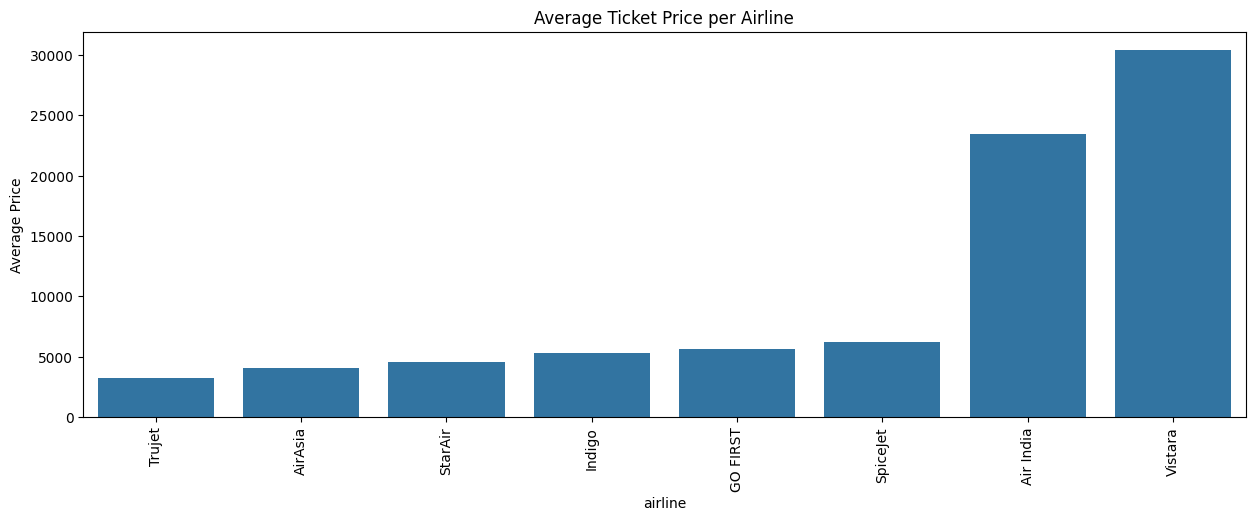

In [ ]:
plt.figure(figsize=(15,5))
avg_price = Data.groupby('airline')['price'].mean().sort_values()
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation='vertical')
plt.title("Average Ticket Price per Airline")
plt.ylabel("Average Price")

## Does the Price of the ticket vary by the time of the day?

([0, 1], [Text(0, 0, '1.0'), Text(1, 0, '2.0')])

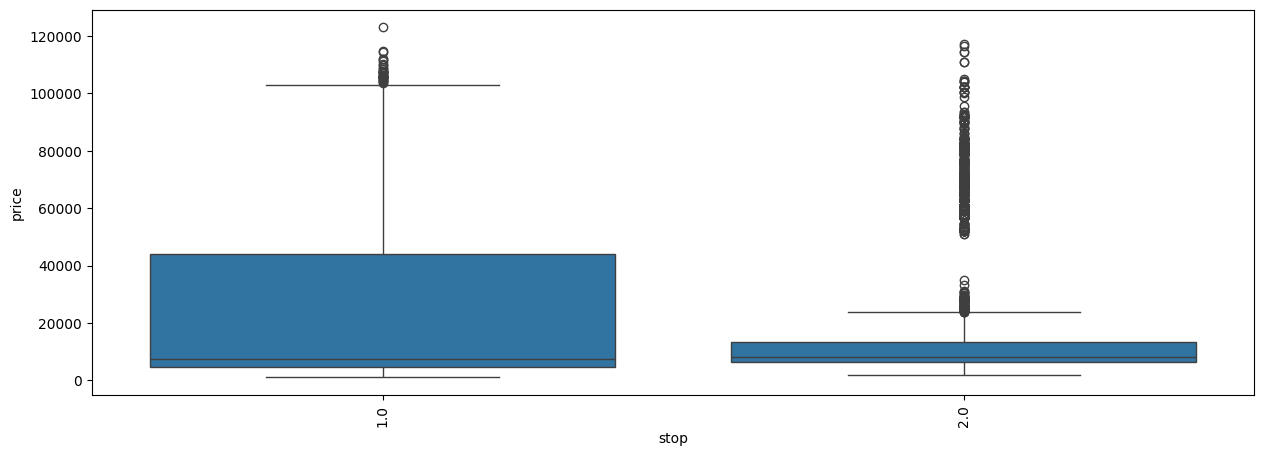

In [ ]:
#Plotting Violin Plot to See The Relation between stops and Price
plt.figure(figsize=(15,5))
sns.boxplot(x='stop',y='price',data=Data)
plt.xticks(rotation='vertical')

## How does the price vary by the time of the day ?


In [ ]:
import altair as alt

# Group by departure time and calculate mean price (assuming 'Data' is your DataFrame)
plot_data = Data.groupby("Dep_DayTime")["price"].mean().reset_index()

# Create the Altair chart
chart = alt.Chart(plot_data).mark_bar(color='orange').encode(
    x=alt.X('Dep_DayTime', title='Departure Time Category', sort=None), # sort=None to maintain original order
    y=alt.Y('price', title='Average Ticket Price'),
    tooltip=['Dep_DayTime', 'price'] # Add tooltips for interactivity
).properties(
    title='Average Ticket Price by Departure Time',
    width=600
).interactive() # Make the chart interactive for zooming and panning

# Show the chart (depending on your environment, you might need to save it)
chart.show()

alt.Chart(...)

##Does Weekend days affect price fare?

<Axes: xlabel='Is_Weekend', ylabel='price'>

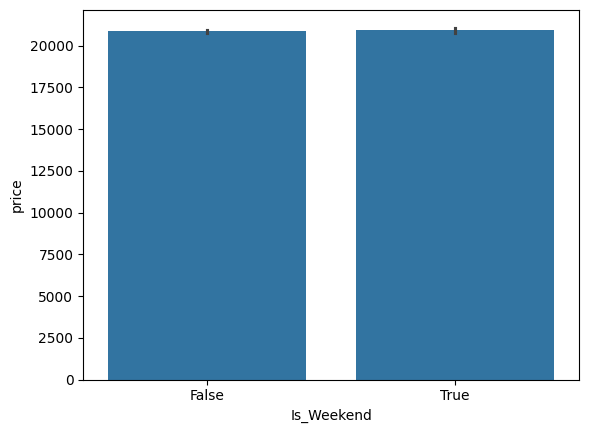

In [ ]:
sns.barplot(x='Is_Weekend',y='price',data=Data)

## Does Total Time Taken affect Ticket Fare ?

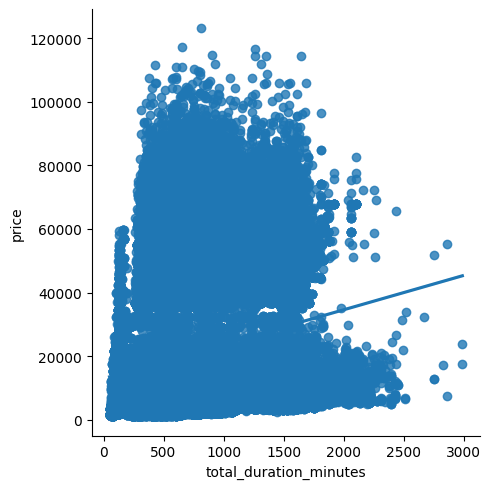

In [ ]:
sns.lmplot(x='total_duration_minutes',y='price',data=Data)

## How does the Journey Month affect flights' fare

<ipython-input-32-32b41b2434ec>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Journey_Month',y='price',data=Data,ci=None)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

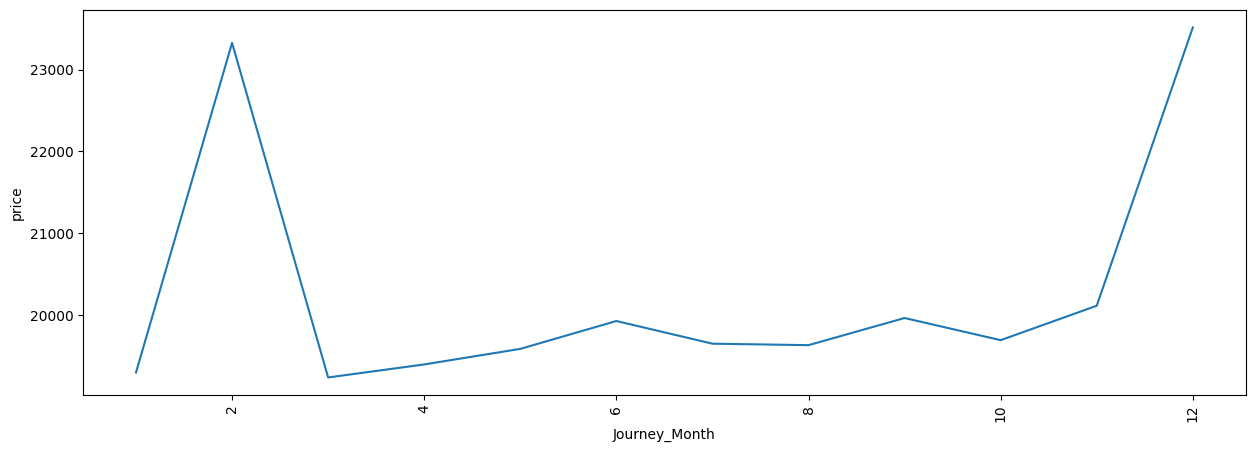

In [ ]:
#Plotting line Plot to See The Relation between journey month and Price
plt.figure(figsize=(15,5))
sns.lineplot(x='Journey_Month',y='price',data=Data,ci=None)
plt.xticks(rotation='vertical')

## Detecting Prices' Outliers

<ipython-input-33-34e3dc940410>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(R_Data[col],ax=ax1)
<ipython-input-33-34e3dc940410>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(R_Data[col],ax=ax3,kde=False)


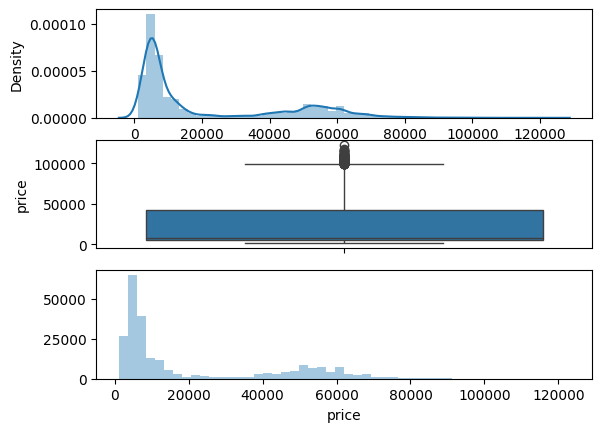

In [ ]:
#Detecting Outliers
def plot(R_Data,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(R_Data[col],ax=ax1)
    sns.boxplot(R_Data[col],ax=ax2)
    sns.distplot(R_Data[col],ax=ax3,kde=False)
plot(Data,'price')

In [ ]:
Q1 = Data['price'].quantile(0.25)
Q3 = Data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Data=Data[(Data['price'] >= lower_bound) & (Data['price'] <= upper_bound)]

<ipython-input-33-34e3dc940410>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(R_Data[col],ax=ax1)
<ipython-input-33-34e3dc940410>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(R_Data[col],ax=ax3,kde=False)


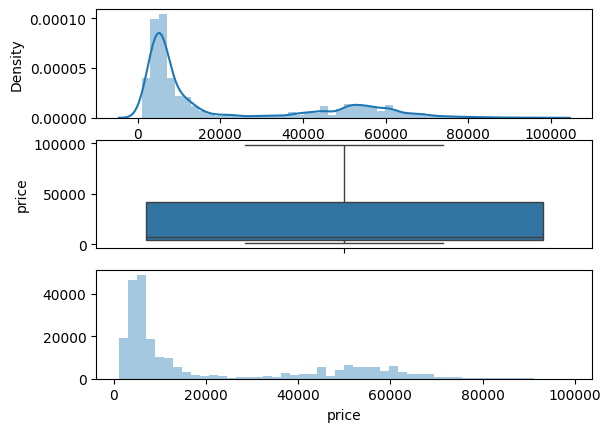

In [ ]:
plot(Data,'price')

##Dropping Unwanted Columns

In [ ]:
pd.set_option('display.max_columns',32)

In [ ]:
Data.head()

,date,airline,ch_code,num_code,time_taken,stop,type,route,price,Journey_Day,Jr_Day_of_Week,Journey_Month,Journey_Year,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime,time_taken_hours,time_taken_minutes,total_duration_minutes,source,destination
0,2022-05-03,Vistara,UK,812,10h 10m,1.0,business,"{'source': 'Bangalore', 'destination': 'Hydera...",56588.0,3,Tuesday,5,2022,False,9,45,19,55,Morning,Evening,10.0,10,610.0,'Bangalore','Hyderabad'
1,2022-03-18,Vistara,UK,975,06h 30m,1.0,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",59649.0,18,Friday,3,2022,False,5,45,12,15,Early Morning,Morning,6.0,30,390.0,'Delhi','Hyderabad'
2,2022-09-03,GO FIRST,G8,7537,08h 10m,1.0,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",3916.0,3,Saturday,9,2022,True,14,30,22,40,Noon,Night,8.0,10,490.0,'Mumbai','Hyderabad'
3,2022-03-15,GO FIRST,G8,287,09h 40m,1.0,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",6031.0,15,Tuesday,3,2022,False,10,40,20,20,Morning,Evening,9.0,40,580.0,'Mumbai','Delhi'
4,2022-03-22,Vistara,UK,826,07h 25m,1.0,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",7081.0,22,Tuesday,3,2022,False,12,30,19,55,Morning,Evening,7.0,25,445.0,'Chennai','Kolkata'


In [ ]:
Data.drop(columns=['time_taken','date','route','Journey_Year'],axis=1,inplace=True)

In [ ]:
Data.head()

,airline,ch_code,num_code,stop,type,price,Journey_Day,Jr_Day_of_Week,Journey_Month,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime,time_taken_hours,time_taken_minutes,total_duration_minutes,source,destination
0,Vistara,UK,812,1.0,business,56588.0,3,Tuesday,5,False,9,45,19,55,Morning,Evening,10.0,10,610.0,'Bangalore','Hyderabad'
1,Vistara,UK,975,1.0,business,59649.0,18,Friday,3,False,5,45,12,15,Early Morning,Morning,6.0,30,390.0,'Delhi','Hyderabad'
2,GO FIRST,G8,7537,1.0,economy,3916.0,3,Saturday,9,True,14,30,22,40,Noon,Night,8.0,10,490.0,'Mumbai','Hyderabad'
3,GO FIRST,G8,287,1.0,economy,6031.0,15,Tuesday,3,False,10,40,20,20,Morning,Evening,9.0,40,580.0,'Mumbai','Delhi'
4,Vistara,UK,826,1.0,economy,7081.0,22,Tuesday,3,False,12,30,19,55,Morning,Evening,7.0,25,445.0,'Chennai','Kolkata'


## Encoding and Feature Selection Process

In [ ]:
Data.dtypes

,0
airline,object
ch_code,object
num_code,int64
stop,float64
type,object
price,float64
Journey_Day,int32
Jr_Day_of_Week,object
Journey_Month,int32
Is_Weekend,bool


In [ ]:
!pip install category_encoders
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Step 1: Split the data
X = Data.drop('price', axis=1)
y = Data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)

# Step 2: Target Encode using only training data
encoder = TargetEncoder(cols=['airline','type','source','destination'])  # Add more columns if needed
encoder.fit(X_train, y_train)

# Step 3: Transform both sets
X_train['airline'] = encoder.transform(X_train)['airline']
X_test['airline'] = encoder.transform(X_test)['airline']
X_train['type'] = encoder.transform(X_train)['type']
X_test['type'] = encoder.transform(X_test)['type']
X_train['source'] = encoder.transform(X_train)['source']
X_test['source'] = encoder.transform(X_test)['source']
X_train['destination'] = encoder.transform(X_train)['destination']
X_test['destination'] = encoder.transform(X_test)['destination']


In [ ]:
X_train.dtypes

,0
airline,float64
ch_code,object
num_code,int64
stop,float64
type,float64
Journey_Day,int32
Jr_Day_of_Week,object
Journey_Month,int32
Is_Weekend,bool
dep_time_hour,int32


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming Data is your DataFrame
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['ch_code', 'Jr_Day_of_Week', 'Dep_DayTime', 'Arr_DayTime','Is_Weekend']

# Apply label encoding to each column in the list
for column in columns_to_encode:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.fit_transform(X_test[column])

In [ ]:
X_train.head()

,airline,ch_code,num_code,stop,type,Journey_Day,Jr_Day_of_Week,Journey_Month,Is_Weekend,dep_time_hour,dep_time_Minute,arr_time_hour,arr_time_Minute,Dep_DayTime,Arr_DayTime,time_taken_hours,time_taken_minutes,total_duration_minutes,source,destination
12687,23430.936825,2,559,1.0,52481.695899,21,1,2,0,6,30,9,0,0,3,2.0,30,150.0,19987.021753,18370.835993
148210,30376.093425,7,940,1.0,6563.585993,31,4,3,0,19,45,20,15,1,1,24.0,30,1470.0,21474.455301,21838.709415
185249,30376.093425,7,986,1.0,52481.695899,29,5,3,0,22,45,19,50,4,1,21.0,5,1265.0,21474.455301,20413.198278
93248,5321.198783,1,6467,1.0,6563.585993,24,4,3,0,13,45,19,50,5,1,6.0,5,365.0,19987.021753,21973.539251
18600,30376.093425,7,808,1.0,6563.585993,23,6,2,0,8,0,18,5,0,1,10.0,5,605.0,21547.594303,21973.539251


In [ ]:
#Ordering Features based on Importance
from sklearn.feature_selection import mutual_info_regression
imp=pd.DataFrame(mutual_info_regression(X_train,y_train),index=X_train.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
num_code,3.517368
total_duration_minutes,2.271580
source,1.517829
destination,1.402824
airline,1.087365
ch_code,1.086743
arr_time_hour,1.031919
time_taken_hours,1.022023
dep_time_hour,1.019011
dep_time_Minute,0.843332


In [ ]:
# Drop the columns from X_train and X_test
columns_to_drop = ['Is_Weekend', 'Jr_Day_of_Week', 'stop', 'Journey_Day', 'Journey_Month', 'Dep_DayTime', 'Arr_DayTime']
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Remove the corresponding rows from y_train and y_test (if any rows are dropped from X_train or X_test)
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


### Model Selection Process

In [ ]:
!pip install catboost
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Initialize the models list
models = []

# Add models to the list
#models.append(('Linear Regression', LinearRegression()))
models.append(('RandomForest', RandomForestRegressor()))

models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)))
models.append(('XGBoost', XGBRegressor()))
models.append(('CatBoost', CatBoostRegressor(verbose=0)))


# Fit, evaluate, and visualize SHAP for each model
for name, model in models:
    print(f"\n--- {name} ---")

    # Train the model
    model.fit(X_train, y_train)
    import joblib
    joblib.dump(model, "random_forest_model.pkl")
    y_pred = model.predict(X_test)
    print(f"R-squared: {model.score(X_test, y_test):.4f}")


--- RandomForest ---
R-squared: 0.9764


In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd
import joblib

# Load your trained model
rf_model = joblib.load("random_forest_model.pkl")

st.title("✈️ Airline Fare Prediction System")

# Input fields
airline = st.selectbox("Select Airline", ["IndiGo", "Air India", "Jet Airways"])
source = st.selectbox("Source City", ["Delhi", "Kolkata", "Mumbai"])
destination = st.selectbox("Destination City", ["Cochin", "Delhi", "Hyderabad"])
total_stops = st.selectbox("Number of Stops", [0, 1, 2, 3])
duration = st.number_input("Duration (in minutes)", min_value=30, max_value=1000)
dep_hour = st.slider("Departure Hour", 0, 23)
dep_minute = st.slider("Departure Minute", 0, 59)

if st.button("Predict Fare"):
    # Make a dataframe for the input
    input_df = pd.DataFrame({
        "Airline": [airline],
        "Source": [source],
        "Destination": [destination],
        "Total_Stops": [total_stops],
        "Duration": [duration],
        "Dep_hour": [dep_hour],
        "Dep_minute": [dep_minute]
    })

    # Preprocessing goes here (e.g., encoding like during training)

    # Predict
    fare = model.predict(input_df)[0]
    st.success(f"Estimated Fare: ₹{fare:.2f}")

  Using cached streamlit-1.45.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
Using cached streamlit-1.45.1-py3-none-any.whl (9.9 MB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)


2025-05-28 15:03:06.315 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 15:03:07.255 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-28 15:03:07.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 15:03:07.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 15:03:07.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 15:03:07.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 15:03:07.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 15:03:07.284 Session state does not 

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define models and their hyperparameter grids
models_params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': list(range(3, 11)),
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # Manhattan and Euclidean distance
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7, 10]
        }
    },
    'CatBoost': {
        'model': CatBoostRegressor(verbose=0),
        'params': {
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8, 10]
        }
    }
}

# Loop through each model and perform RandomizedSearchCV
for name, mp in models_params.items():
    print(f"Running RandomizedSearchCV for {name}...")
    rand_search = RandomizedSearchCV(
        estimator=mp['model'],
        param_distributions=mp['params'],
        n_iter=10,  # number of parameter settings sampled
        scoring='r2',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best params for {name}: {rand_search.best_params_}")
    print(f"{name} R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom xgboost import XGBRegressor\nfrom catboost import CatBoostRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\nimport numpy as np\n\n# Define models and their hyperparameter grids\nmodels_params = {\n    \'RandomForest\': {\n        \'model\': RandomForestRegressor(),\n        \'params\': {\n            \'n_estimators\': [50, 100, 200],\n            \'max_depth\': [None, 10, 20, 30],\n            \'min_samples_split\': [2, 5, 10],\n            \'min_samples_leaf\': [1, 2, 4]\n        }\n    },\n    \'DecisionTree\': {\n        \'model\': DecisionTreeRegressor(),\n        \'params\': {\n            \'max_depth\': [None, 10, 20, 30],\n            \'min_samples_split\': [2, 5, 10],\n            \'min_samples_leaf\': [1, 2, 4]\n        }\n    },\n    \'KNN\': {\n